In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
from dataload import *
from model import *
from research import *
from helper_functions import *

DATA

In [3]:
calculer = False

In [4]:
if calculer == False:
  dataframe = pd.read_csv('../data/Pays-Bas/Eredevisie/N1_fullDataWithNotes.csv')
else:
  dataframe = pd.read_csv('../data/Pays-Bas/Eredevisie/N1 10:11.csv')
  for i in range(10, 23):
    d2 = pd.read_csv(f"../data/Pays-Bas/Eredevisie/N1 {i}:{i + 1}.csv")
    dataframe = pd.concat([dataframe, d2])
  dataframe = arrange_data(dataframe, 'FTHG', 'FTAG', 'HA_Scored')

print(f"{dataframe.tail(20).to_string()}\n")

            Date          HomeTeam          AwayTeam  FTHG  FTAG  HA_Scored      Note
4073  29/01/2023           Cambuur       For Sittard     1     2          1  0.377285
4074  01/02/2023          Waalwijk   Go Ahead Eagles     3     1          1  0.500924
4075  03/02/2023       For Sittard  Sparta Rotterdam     0     0          0  0.317782
4076  04/02/2023          Volendam        AZ Alkmaar     1     1          1  0.549097
4077  04/02/2023          FC Emmen           Vitesse     2     2          1  0.438255
4078  04/02/2023           Utrecht        Heerenveen     1     0          0  0.349113
4079  04/02/2023         Excelsior          Waalwijk     0     0          0  0.362927
4080  05/02/2023           Cambuur              Ajax     0     5          0  0.414958
4081  05/02/2023         Feyenoord     PSV Eindhoven     2     2          1  0.435343
4082  05/02/2023   Go Ahead Eagles          Nijmegen     1     0          0  0.406888
4083  05/02/2023         Groningen            Twente  

In [5]:
#display(dataframe.dtypes)

MODÈLE

In [6]:
if calculer != False:
    dataframe['Note'] = ''
    dataframe = get_notes(dataframe, 'HomeTeam', 'AwayTeam', 'Date', 'Note', 'HA_Scored', 1)

In [7]:
if calculer != False:
    print(f"{dataframe.tail(20).to_string()}\n")

In [8]:
if calculer != False:
    dtcsv = dataframe.to_csv(index=None)
    fichier = open("../data/Pays-Bas/Eredevisie/N1_fullDataWithNotes.csv", "w")
    fichier.write(dtcsv)
    fichier.close()
    print(dtcsv)

RECHERCHE

In [9]:
lenMatchGroups = 29
data = get_data(dataframe, 'HA_Scored', 'Date', 'Note', lenMatchGroups, 55, 56, 1.4, 1, 42, 43, 1)

Note : 0.55
42% à chaque pari
[1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1]
Sous-résultat : 26/29, 89.65% de réussite
[1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1]
Sous-résultat : 26/29, 89.65% de réussite
[1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1]
Sous-résultat : 24/29, 82.75% de réussite
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Sous-résultat : 29/29, 100.0% de réussite
[1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1]
Sous-résultat : 26/29, 89.65% de réussite
[1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1]
Sous-résultat : 25/29, 86.2% de réussite
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Sous-résultat : 29/29, 100.0% de réussite
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 

1
Note : 0.55


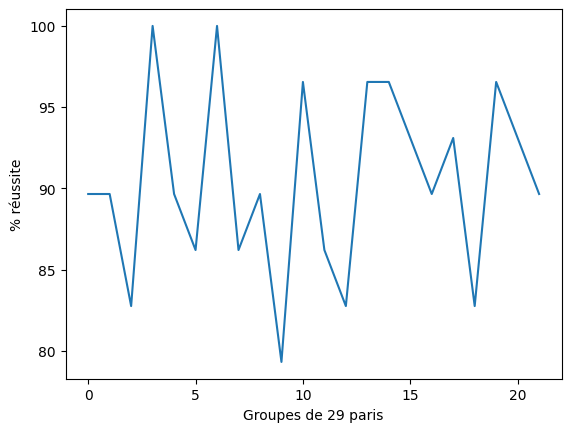

In [10]:
print(len(data))
get_plots(data, lenMatchGroups)

PARIS

In [11]:
arrayEquipes = get_equipes(dataframe, 0, 18, 'HomeTeam', 'AwayTeam')

print_array_equipes(arrayEquipes)

0 - Twente
1 - Volendam
2 - Ajax
3 - Waalwijk
4 - Vitesse
5 - Utrecht
6 - Heerenveen
7 - Feyenoord
8 - Sparta Rotterdam
9 - Go Ahead Eagles
10 - FC Emmen
11 - For Sittard
12 - PSV Eindhoven
13 - Groningen
14 - Nijmegen
15 - Cambuur
16 - AZ Alkmaar
17 - Excelsior


In [12]:
afficher_note_match(dataframe, arrayEquipes[3], arrayEquipes[11], 0, 'HomeTeam', 'AwayTeam', 'HA_Scored', 'Date')
afficher_note_match(dataframe, arrayEquipes[1], arrayEquipes[4], 0, 'HomeTeam', 'AwayTeam', 'HA_Scored', 'Date')
afficher_note_match(dataframe, arrayEquipes[13], arrayEquipes[10], 0, 'HomeTeam', 'AwayTeam', 'HA_Scored', 'Date')
afficher_note_match(dataframe, arrayEquipes[7], arrayEquipes[16], 0, 'HomeTeam', 'AwayTeam', 'HA_Scored', 'Date')
afficher_note_match(dataframe, arrayEquipes[15], arrayEquipes[6], 0, 'HomeTeam', 'AwayTeam', 'HA_Scored', 'Date')
afficher_note_match(dataframe, arrayEquipes[9], arrayEquipes[0], 0, 'HomeTeam', 'AwayTeam', 'HA_Scored', 'Date')
afficher_note_match(dataframe, arrayEquipes[5], arrayEquipes[12], 0, 'HomeTeam', 'AwayTeam', 'HA_Scored', 'Date')
afficher_note_match(dataframe, arrayEquipes[2], arrayEquipes[8], 0, 'HomeTeam', 'AwayTeam', 'HA_Scored', 'Date')
afficher_note_match(dataframe, arrayEquipes[17], arrayEquipes[14], 0, 'HomeTeam', 'AwayTeam', 'HA_Scored', 'Date')

Match : Waalwijk - For Sittard
Note : 0.4462690537797766

Match : Volendam - Vitesse
Note : 0.44369978758490913

Match : Groningen - FC Emmen
Note : 0.36036239103174517

Match : Feyenoord - AZ Alkmaar
Note : 0.5569315801279046

Match : Cambuur - Heerenveen
Note : 0.23064506087803693

Match : Go Ahead Eagles - Twente
Note : 0.4245037291774528

Match : Utrecht - PSV Eindhoven
Note : 0.38047664488920074

Match : Ajax - Sparta Rotterdam
Note : 0.44957589665485254

Match : Excelsior - Nijmegen
Note : 0.273066199194622



['Excelsior', 'Nijmegen', 0.273066199194622]

In [13]:
print(calcul_somme(220, 0.42))

92.39999999999999
